## 加载数据

In [1]:
import pandas as pd

# 1. 数据加载
data = pd.read_csv('catalyst_data.csv')
data

,Surface_Area,Porosity,Activity
0,296.966077,0.348305,150.930937
1,371.835215,0.398428,188.751626
2,321.243519,0.519976,171.416524
3,295.197432,0.700476,145.468850
4,240.644660,0.366806,120.723908
...,...,...,...
495,172.243745,0.178141,81.426619
496,254.949867,0.511938,127.374869
497,230.771091,0.850730,122.813073
498,161.786059,0.282917,86.383436


## 可视化原始数据

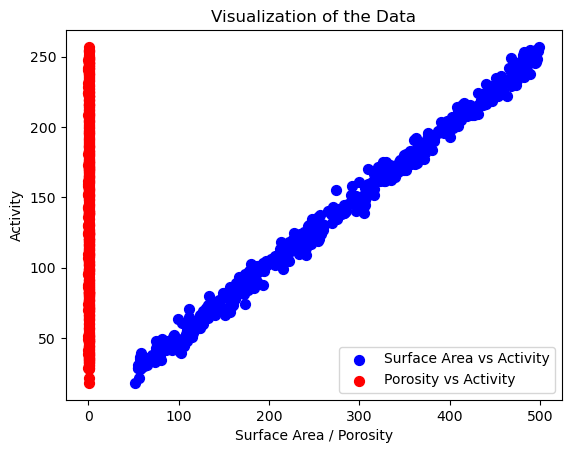

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 从CSV文件读取数据
data = pd.read_csv('catalyst_data.csv')
surface_areas = data['Surface_Area'].values
porosities = data['Porosity'].values
activities = data['Activity'].values

# 可视化数据点
plt.scatter(surface_areas, activities, color='blue', s=50, label='Surface Area vs Activity')
plt.scatter(porosities, activities, color='red', s=50, label='Porosity vs Activity')
plt.xlabel('Surface Area / Porosity')
plt.ylabel('Activity')
plt.legend()
plt.title('Visualization of the Data')
plt.show()

## 机器学习：测试不同深度的结果，给出模型评价报告，可视化测试集结果

Results for depth=1:
Mean Squared Error: 1069.625336051881
------------------------------------------------------
Results for depth=3:
Mean Squared Error: 102.06113324856648
------------------------------------------------------
Results for depth=5:
Mean Squared Error: 38.25008898121553
------------------------------------------------------
Results for depth=7:
Mean Squared Error: 46.67181540212237
------------------------------------------------------
Results for depth=9:
Mean Squared Error: 50.80114786239016
------------------------------------------------------
Results for depth=11:
Mean Squared Error: 56.02127968704387
------------------------------------------------------
The best depth is: 5 with minimum MSE: 38.25008898121553


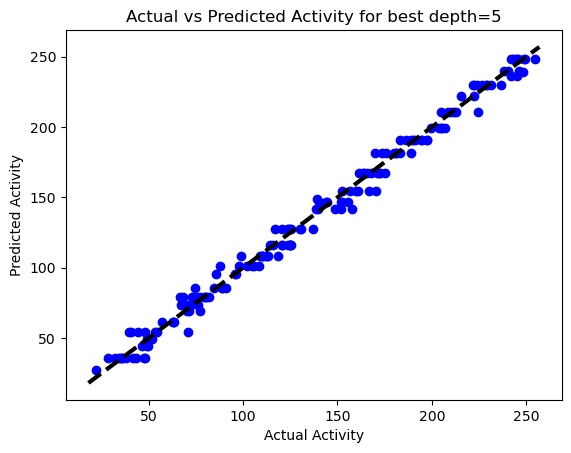

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 分割数据为训练集和测试集
X = data[['Surface_Area', 'Porosity']].values
y = activities
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

depths = [1, 3, 5, 7, 9, 11]
mse_values = []

for depth in depths:
    dt_reg = DecisionTreeRegressor(max_depth=depth)
    dt_reg.fit(X_train, y_train)
    y_pred = dt_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    
    print(f"Results for depth={depth}:")
    print("Mean Squared Error:", mse)
    print("------------------------------------------------------")

# 选择MSE最小的深度
best_depth = depths[mse_values.index(min(mse_values))]
print(f"The best depth is: {best_depth} with minimum MSE: {min(mse_values)}")

# 使用最优的深度进行可视化
dt_best = DecisionTreeRegressor(max_depth=best_depth)
dt_best.fit(X_train, y_train)
y_pred_best = dt_best.predict(X_test)

plt.scatter(y_test, y_pred_best, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual Activity')
plt.ylabel('Predicted Activity')
plt.title(f'Actual vs Predicted Activity for best depth={best_depth}')
plt.show()

## 可视化决策树

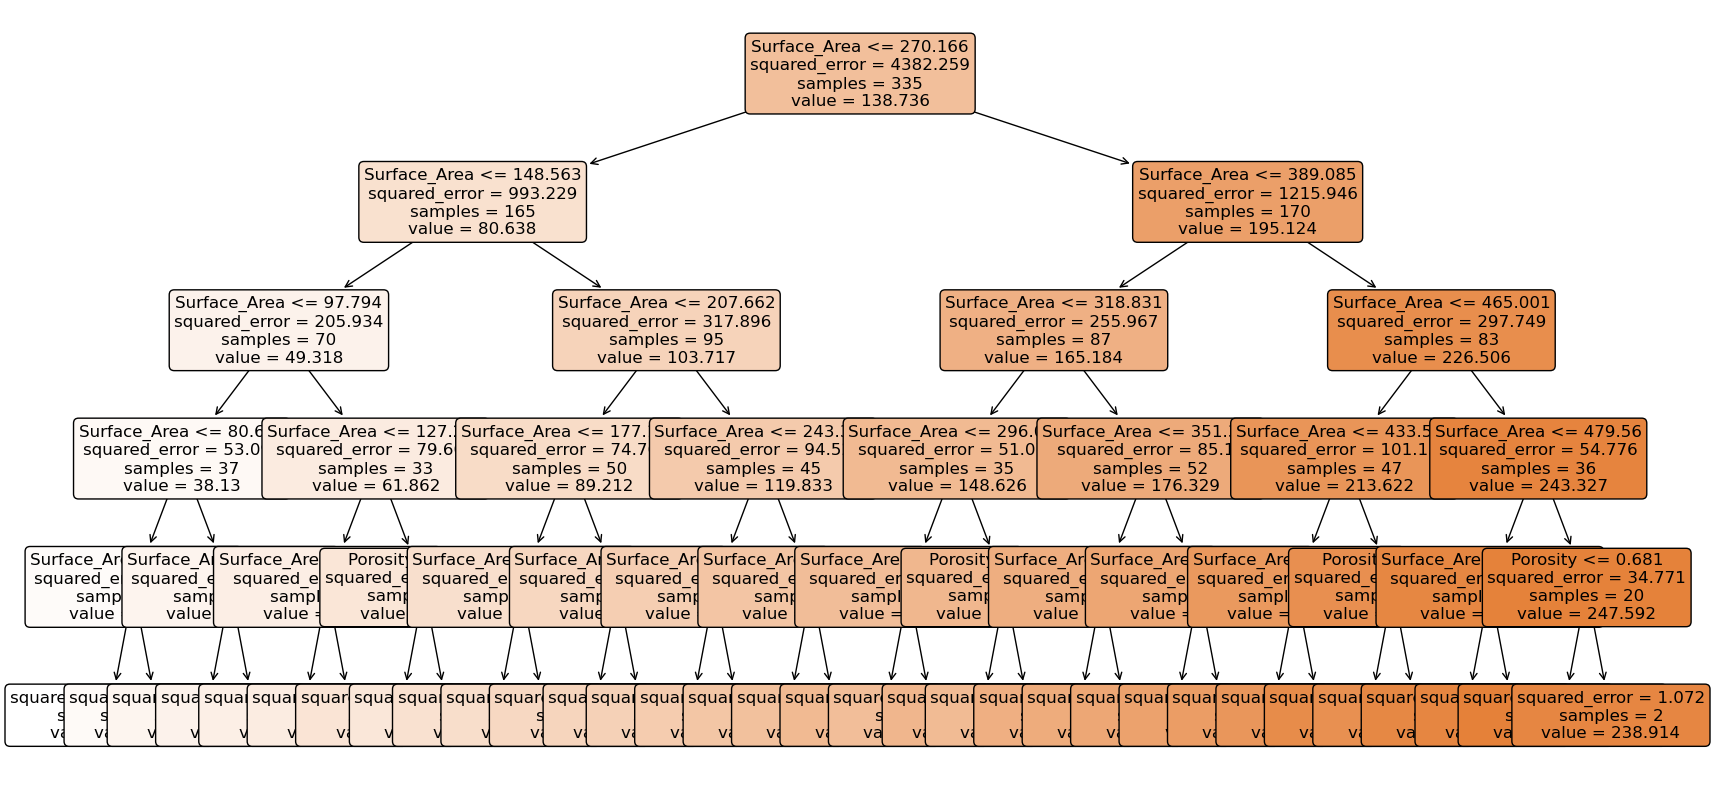

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 使用上文中选出的最优深度训练决策树模型
dt_best = DecisionTreeRegressor(max_depth=best_depth)
dt_best.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(20, 10))
plot_tree(dt_best, feature_names=['Surface_Area', 'Porosity'], filled=True, rounded=True, fontsize=12)
plt.show()


## 随机森林

Random Forest Mean Squared Error: 30.583430607861636


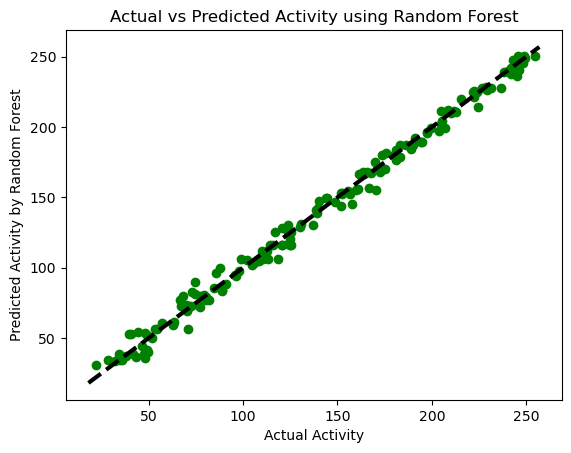

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 使用随机森林进行回归预测
rf = RandomForestRegressor(n_estimators=100, max_depth=best_depth, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 评估模型
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

# 可视化实际值与预测值
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual Activity')
plt.ylabel('Predicted Activity by Random Forest')
plt.title('Actual vs Predicted Activity using Random Forest')
plt.show()